In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
data.keys()

/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [2]:
data["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
X, y = data["data"], data["target"]

In [4]:
#NO STANDARD SCALING HERE BECAUSE SCALING IS IRRELEVANT FOR DECISION TREES!!!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = pd.DataFrame(X_train,columns=data["feature_names"])
X_test = pd.DataFrame(X_test,columns=data["feature_names"])
y_train = pd.DataFrame(y_train,columns=["target"])
y_test = pd.DataFrame(y_test,columns=["target"])

In [5]:
def plotCVResults(cv_res, names):
    fig = plt.figure(figsize=(20,10))
    trainin_time_ax = fig.add_subplot(2,1,2)
    for i in range(4):
        name = names[i]
        df_reg = pd.DataFrame(cv_res[i])

        ax = fig.add_subplot(2,4,i+1)

        ax.set_title(name + " scores, adj. avg test: " + \
                     str(round(df_reg.loc[df_reg["test_score"]>0]["test_score"].mean(),2)))
        ax.set_xlabel("iteration")
        ax.set_ylabel("R2 score")
        ax.set_ylim(0,1)
        df_reg[["train_score","test_score"]].plot(ax=ax)

        df_reg["fit_time"].plot(ax=trainin_time_ax,label=name)

    plt.sca(trainin_time_ax)
    plt.legend()
    plt.show()

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

cv_res = []
mds = range(1,11,3) #for different maximum depths parameters
C = 0.1
for md in mds:
    cv_res.append(cross_validate(# DecisionTreeRegressor(max_depth=md, criterion='mse'),
                                 RandomForestRegressor(max_depth=md, criterion='mse'), #RFR makes 100 decision trees
                            X_train,
                            y_train,
                            cv = 5,# we will keep it at 5, since that gives each sample set around 80 samples
                            return_train_score = True,
                            return_estimator = True,
                            n_jobs = 2))

/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 

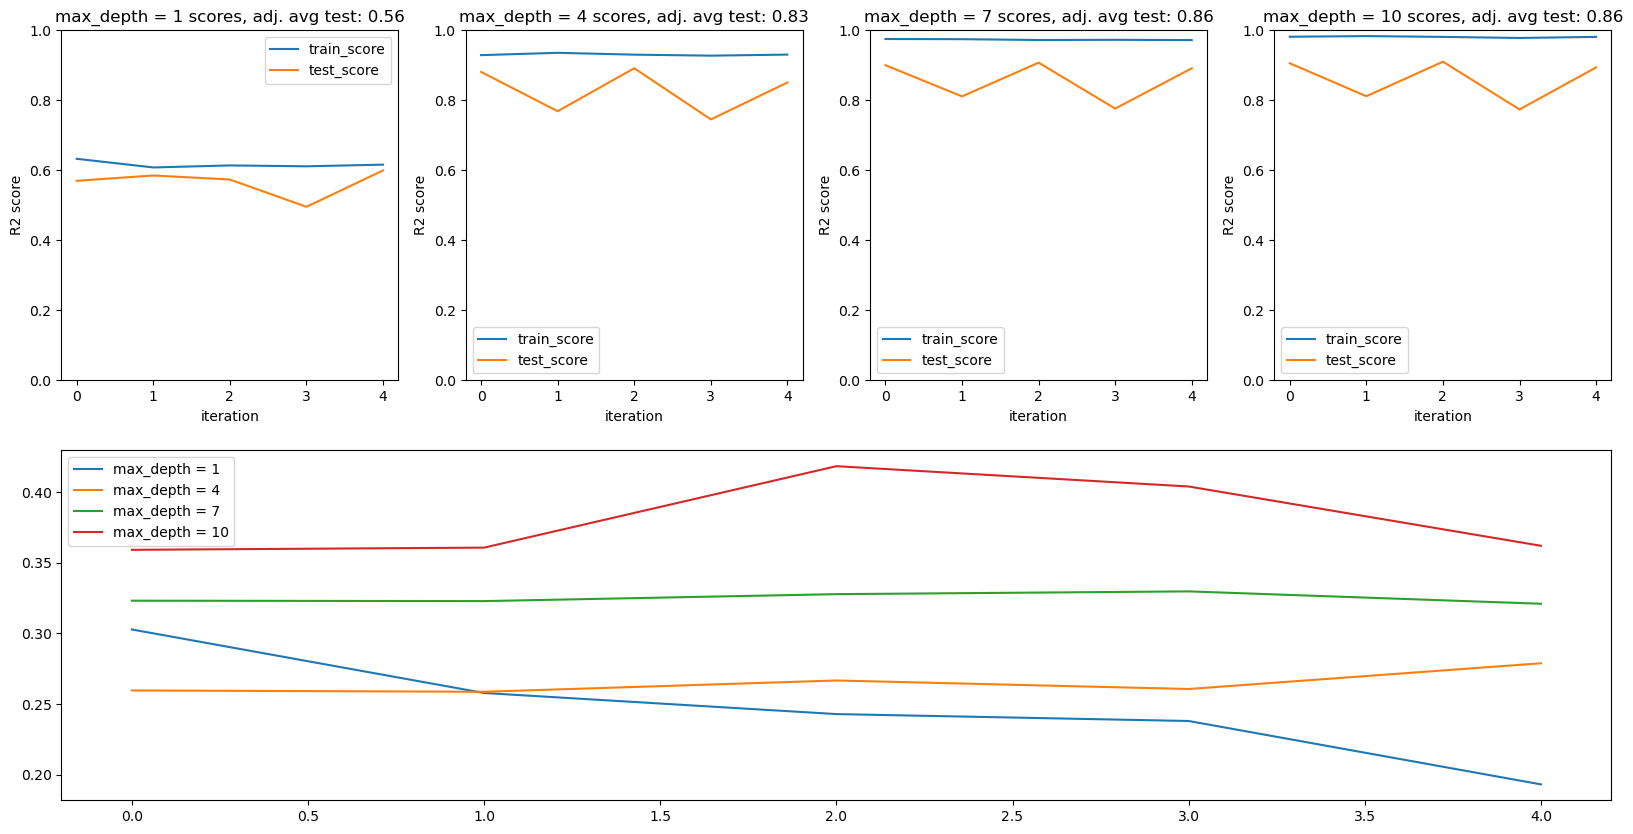

In [7]:
plotCVResults(cv_res, ['max_depth = '+str(x) for x in mds])
# first we underfit, then we start overfitting between 4->7
#changing the decision tree regressor to the random forest regressor we encounter less underfitting and diverging
#still overfitting
#RF still underfits for depth=1

/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 an

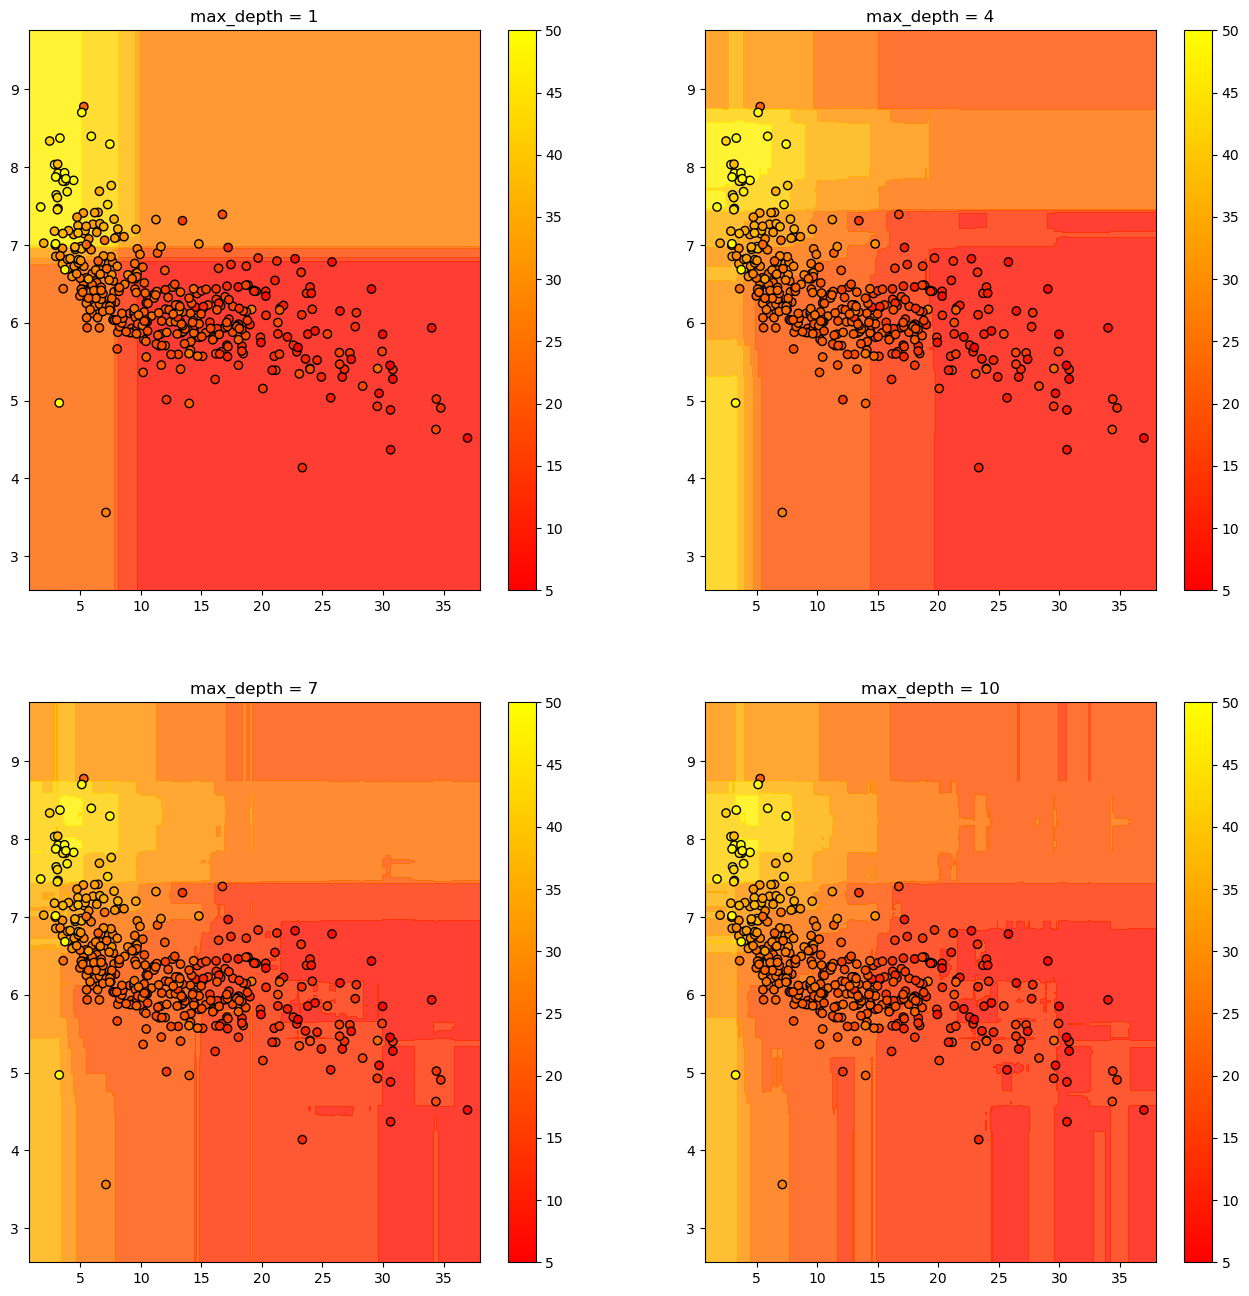

In [8]:
fig = plt.figure(figsize=(16,16))
for md in mds:
    ax = fig.add_subplot(2,2,mds.index(md)+1)
#     reg_model = DecisionTreeRegressor(max_depth=md, criterion='mse')
    reg_model = RandomForestRegressor(max_depth=md, criterion='mse')
    reg_model.fit(X_train[['LSTAT','RM']],y_train['target'].ravel())
    h = .02
    x_min, x_max = X_train['LSTAT'].min() - 1, X_train['LSTAT'].max() + 1
    y_min, y_max = X_train['RM'].min() - 1, X_train['RM'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = reg_model.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.autumn, alpha=0.8)
    plt.scatter(X_train['LSTAT'],X_train['RM'],c=y_train['target'].ravel(), cmap=plt.cm.autumn,edgecolors='black')
    plt.colorbar()
    plt.title('max_depth = '+str(md))
plt.show()

#results:
#random forest makes more boundaries than decision tree and a much better split
#depth 1: good split, looks very decent
#depth 4: still looks good
#depth 7+10: many streaks coming in (signs of overfitting!!!)